<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek37.do.txt  -->
<!-- dom:TITLE: Exercises week 37 -->

# Exercises week 37
**Implementing gradient descent for Ridge and ordinary Least Squares Regression**

Date: **September 8-12, 2025**

## Learning goals

After having completed these exercises you will have:
1. Your own code for the implementation of the simplest gradient descent approach applied to ordinary least squares (OLS) and Ridge regression

2. Be able to compare the analytical expressions for OLS and Ridge regression with the gradient descent approach

3. Explore the role of the learning rate in the gradient descent approach and the hyperparameter $\lambda$ in Ridge regression

4. Scale the data properly

## Simple one-dimensional second-order polynomial

We start with a very simple function

$$
f(x)= 2-x+5x^2,
$$

defined for $x\in [-2,2]$. You can add noise if you wish. 

We are going to fit this function with a polynomial ansatz. The easiest thing is to set up a second-order polynomial and see if you can fit the above function.
Feel free to play around with higher-order polynomials.

## Exercise 1, scale your data

Before fitting a regression model, it is good practice to normalize or
standardize the features. This ensures all features are on a
comparable scale, which is especially important when using
regularization. Here we will perform standardization, scaling each
feature to have mean 0 and standard deviation 1.

### 1a)

Compute the mean and standard deviation of each column (feature) in your design/feature matrix $\boldsymbol{X}$.
Subtract the mean and divide by the standard deviation for each feature.

We will also center the target $\boldsymbol{y}$ to mean $0$. Centering $\boldsymbol{y}$
(and each feature) means the model does not require a separate intercept
term, the data is shifted such that the intercept is effectively 0
. (In practice, one could include an intercept in the model and not
penalize it, but here we simplify by centering.)
Choose $n=100$ data points and set up $\boldsymbol{x}$, $\boldsymbol{y}$ and the design matrix $\boldsymbol{X}$.

In [1]:
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(452)

numb = 1000
X = np.random.rand(numb,1) * 4 - 2
Y = 2.0 - X + 5*(X**2) + np.random.uniform(0, 25)

In [3]:
# Standardize features (zero mean, unit variance for each feature)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # safeguard to avoid division by zero for constant features
X_norm = (X - X_mean) / X_std

# Center the target to zero mean (optional, to simplify intercept handling)
y_mean = Y.mean(axis=0)
Y_std = Y.std(axis=0)
print(f'y std is: {Y_std}')
Y_std[Y_std == 0] = 1
y_centered = (Y - y_mean)/Y_std

y std is: [6.38380034]


as we get y quite spreaded from 0 to 25+ with standart deviation 6.12 I desided that we can devide y bu std as well as x values.

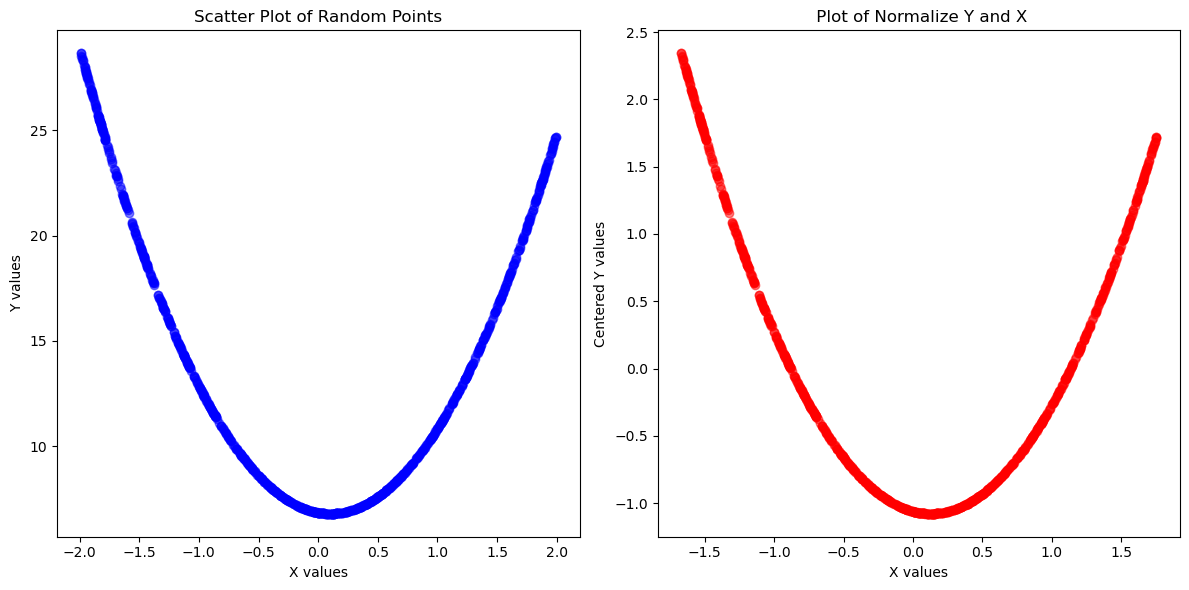

In [4]:
# Create the figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First plot: Scatter plot of original X and Y
axs[0].scatter(X, Y, color='blue', alpha=0.5)
axs[0].set_title('Scatter Plot of Random Points')
axs[0].set_xlabel('X values')
axs[0].set_ylabel('Y values')

# Second plot: Scatter plot of centered X and centered Y
axs[1].scatter(X_norm, y_centered, color='red', alpha=0.5)
axs[1].set_title(' Plot of Normalize Y and X')
axs[1].set_xlabel('X values')
axs[1].set_ylabel('Centered Y values')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Fill in the necessary details. Do we need to center the $y$-values? 

After this preprocessing, each column of $\boldsymbol{X}_{\mathrm{norm}}$ has mean zero and standard deviation $1$
and $\boldsymbol{y}_{\mathrm{centered}}$ has mean 0. This makes the optimization landscape
nicer and ensures the regularization penalty $\lambda \sum_j
\theta_j^2$ in Ridge regression treats each coefficient fairly (since features are on the
same scale).

<div style="background-color: #f0f0f0; border: 1px solid #d3d3d3; padding: 10px; border-radius: 5px;">

There is no strict need to center y values, but it can help as to get better understanding of data. On the plot above we see that we have x values from -2 to 2, but y can take any value from 0 up to 30. Centering it can help to increase interpretability. 

## Exercise 2, calculate the gradients

Find the gradients for OLS and Ridge regression using the mean-squared error as cost/loss function.

  .

This exercise interprited as theoretical and contains calculations of gradients for OLS and Ridge regression.
Full working code for the same in part 4 of the weekly exercises.

For OLS we have following loss function:
$$
C(\theta) = \frac{1}{n}||X\theta-\mathbf{y}||_{2}^{2} = \frac{1}{n}\sum_{i=1}^{100}\left[ (\theta_0 + \theta_1 x_i)^2 - 2 y_i (\theta_0 + \theta_1 x_i) + y_i^2\right]
$$

$$
\frac{ \partial ( {C(\theta}))}{\partial {\theta_0}}=
2(\theta_0 + \theta_1 x_i) - 2 y_i=
2(\theta_0 + \theta_1 x_i - y_i)
$$

$$
\frac{ \partial ( {C(\theta}))}{\partial {\theta_1}}= 
2(\theta_0 + \theta_1 x_i)x_i - 2 y_i x_i=
2 x_i (\theta_0 + \theta_1 x_i - y_i)
$$

Thus in matrix form we can write gradien as:
$$
\nabla_{\theta} C(\theta) = \frac{2}{n}X^T(X\theta - \mathbf{y}),
$$

and we can approximate to the theta value by subtracting from current theta gradint multiplied on constant rate that can be either choosen randomly, or as 1/ $\lambda$ where $\lambda$ is a max eigenvalue of Hessian matrix 

$$
\theta_{k+1} = \theta_k - \eta \nabla_\theta C(\theta_k)
$$

when the value of $\theta_k$ is relatively small (less than $10^{-8}$) we can stop iterating to save some computing power.

Gradient descend for Ridge regression calculated similarly, but with additional $\lambda\theta^2$ component:

$$
C_{\text{ridge}}(\theta) = \frac{1}{n} \| X \theta - \mathbf{y} \|^2 + \lambda \| \theta \|^2 =
\frac{1}{n} \sum_{i=1}^{n}( \left[ (\theta_0 + \theta_1 x_i)^2 - 2 y_i (\theta_0 + \theta_1 x_i) + y_i^2 \right] + \lambda \| \theta \|^2)
$$


$$
\frac{ \partial ( {C_{ridge}(\theta}))}{\partial {\theta_0}} =
2(\theta_0 + \theta_1 x_i) - 2 y_i + 2 \lambda\theta =
2((\theta_0 + \theta_1 x_i) - y_i + \lambda\theta_0) 
$$

$$
\frac{ \partial ( {C_{ridge}(\theta}))}{\partial {\theta_1}} =
2(\theta_0 + \theta_1 x_i) - 2 y_i + 2 \lambda\theta =
2((\theta_0 + \theta_1 x_i)x_i - y_i x_i + \lambda\theta_1)
$$

$$
\nabla_{\theta} C_{ridge}(\theta) = 2 (\frac{1}{n}X^T(X\theta - \mathbf{y})+\lambda \theta).
$$

This gradient we use the same way as for OLS and stop calculations when the value is arbitrary low.

## Exercise 3

In [5]:
#split data to test and train
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_centered, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

In [6]:
# the number of datapoints
n = int(numb * 0.8)
m = int(numb * 0.2)
X = np.c_[np.ones((n,1)), X_train, X_train**2]

X_test = np.c_[np.ones((m,1)), X_test, X_test**2]

In [7]:
# Set regularization parameter, either a single value or a vector of values
# Note that lambda is a python keyword. The lambda keyword is used to create small, single-expression functions without a formal name. 
#These are often called "anonymous functions" or "lambda functions."
lam = 0.01

# Analytical form for OLS and Ridge solution: theta_Ridge = (X^T X + lambda * I)^{-1} X^T y and theta_OLS = (X^T X)^{-1} X^T y
I = np.eye(len(X.T @ X) )
theta_closed_formRidge = np.linalg.inv(X.T @ X + 2 * lam * I ) @ X.T @ y_train
theta_closed_formOLS = np.linalg.inv(X.T @ X ) @ X.T @ y_train

print("Closed-form Ridge coefficients: \n", theta_closed_formRidge)
print("Closed-form OLS coefficients: \n", theta_closed_formOLS)

Closed-form Ridge coefficients: 
 [[-1.06092231]
 [-0.26934825]
 [ 1.06094798]]
Closed-form OLS coefficients: 
 [[-1.06101025]
 [-0.269357  ]
 [ 1.06101025]]


This computes the Ridge and OLS regression coefficients directly. The identity
matrix $I$ has the same size as $X^T X$. It adds $\lambda$ to the diagonal of $X^T X$ for Ridge regression. We
then invert this matrix and multiply by $X^T y$. The result
for $\boldsymbol{\theta}$  is a NumPy array of shape (n$\_$features,) containing the
fitted parameters $\boldsymbol{\theta}$.

### 3a)

Finalize, in the above code, the OLS and Ridge regression determination of the optimal parameters $\boldsymbol{\theta}$.

<div style="background-color: #f0f0f0; border: 1px solid #d3d3d3; padding: 10px; border-radius: 5px;">


As long as the lambda value is near 0, we get almost identical values for thetas calculated by Ridge regression and OLS. 

### 3b)

Explore the results as function of different values of the hyperparameter $\lambda$. See for example exercise 4 from week 36.

In [8]:
# Calculate MSE
MSE_train = mean_squared_error(y_train, X @ theta_closed_formOLS)
MSE_test = mean_squared_error(y_test, X_test @ theta_closed_formOLS)

print("MSE train OSL:", MSE_train)
print("MSE test: OSL", MSE_test)

MSE train OSL: 1.836507672303799e-31
MSE test: OSL 2.078779267937652e-31


In [9]:
# Define the range for lambda
lamb = np.arange(0, 6000, 1000)
degrees = len(lamb)  # The number of degrees will match the number of lambdas
MSE_train_R = np.zeros(degrees)
MSE_test_R = np.zeros(degrees)

for i in range(degrees):
    theta = np.linalg.inv(X.T @ X + 2 * lamb[i] * I ) @ X.T @ y_train
    # Calculate MSE
    MSE_train_R[i] = mean_squared_error(y_train, X @ theta)
    MSE_test_R[i] = mean_squared_error(y_test, X_test @ theta)

# Print headers
print(f"{'Lambda':<20} {'MSE Train':<20} {'MSE Test':<20}")
for i in range(degrees):
    print(f"{lamb[i]:<20.8f} {MSE_train_R[i]:<20.8f} {MSE_test_R[i]:<20.8f}")

Lambda               MSE Train            MSE Test            
0.00000000           0.00000000           0.00000000          
1000.00000000        0.65937745           0.60584159          
2000.00000000        0.78652828           0.72980512          
3000.00000000        0.84455315           0.78748024          
4000.00000000        0.87841345           0.82143326          
5000.00000000        0.90072500           0.84391704          


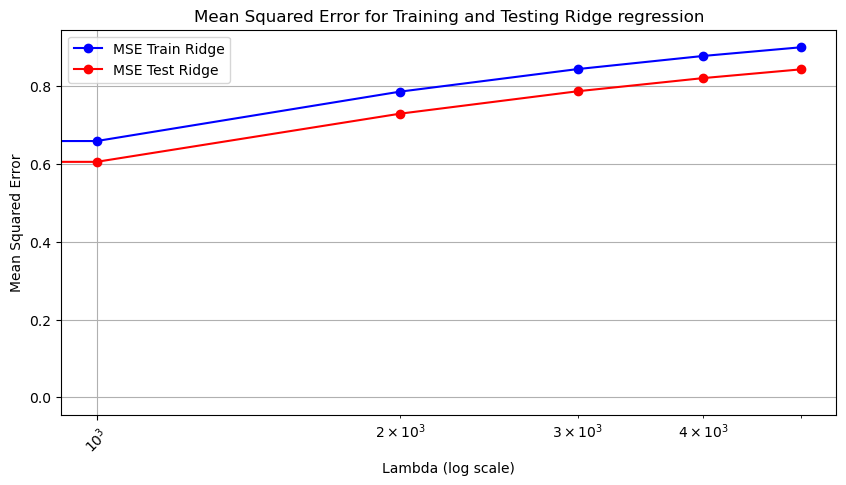

In [10]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(lamb, MSE_train_R, marker='o', label='MSE Train Ridge', color='blue')
plt.plot(lamb, MSE_test_R, marker='o', label='MSE Test Ridge', color='red')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Mean Squared Error for Training and Testing Ridge regression')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)  # Optionally adjust tick labels for clarity
plt.legend()
plt.grid()
plt.show()

We see that both train and test errors increase as we move away from close to 0 value. 

## Exercise 4, Implementing the simplest form for gradient descent

Alternatively, we can fit the ridge regression model using gradient
descent. This is useful to visualize the iterative convergence and is
necessary if $n$ and $p$ are so large that the closed-form might be
too slow or memory-intensive. We derive the gradients from the cost
functions defined above. Use the gradients of the Ridge and OLS cost functions with respect to
the parameters  $\boldsymbol{\theta}$ and set up (using the template below) your own gradient descent code for OLS and Ridge regression.

Below is a template code for gradient descent implementation of ridge:

In [11]:
# Gradient descent parameters, learning rate eta first
eta = 0.1
# Then number of iterations
num_iters = 1000

# Initialize weights for gradient descent
theta = np.zeros(n_features)

# Gradient descent loop
for t in range(num_iters):
    # Compute gradients for OSL and Ridge
    grad_OLS = ?
    grad_Ridge = ?
    # Update parameters theta
    theta_gdOLS = ?
    theta_gdRidge = ? 

# After the loop, theta contains the fitted coefficients
theta_gdOLS = ?
theta_gdRidge = ?
print("Gradient Descent OLS coefficients:", theta_gdOLS)
print("Gradient Descent Ridge coefficients:", theta_gdRidge)

SyntaxError: invalid syntax (1693042512.py, line 12)

### 4a)

Write first a gradient descent code for OLS only using the above template.
Discuss the results as function of the learning rate parameters and the number of iterations

In [12]:
# Hessian matrix
H = (2.0/n)* X.T @ X
EigValues, EigVectors = np.linalg.eig(H)


theta_gdOLS =np.zeros((3, 1))# start theta as random var.
eta = 1.0/np.max(EigValues) 
Niterations = 1000
convrg = 0

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ theta_gdOLS-y_train)
    old_theta = theta_gdOLS.copy()
    theta_gdOLS -= eta*gradient
    convrg +=1
    if np.all(gradient < 1e-8):
        break

print("Gradient Descent OLS coefficients:",'\n',theta_gdOLS)
print('Converges at step: ',convrg)

Gradient Descent OLS coefficients: 
 [[-1.06101024]
 [-0.269357  ]
 [ 1.06101024]]
Converges at step:  125


### 4b)

Write then a similar code for Ridge regression using the above template.
Try to add a stopping parameter as function of the number iterations and the difference between the new and old $\theta$ values. How would you define a stopping criterion?

In [14]:
#Ridge
XT_X = X.T @ X
#Ridge parameter lambda
lmbda  = 0.001

# Hessian matrix
H = (2.0/n)* XT_X +2*lmbda* np.eye(XT_X.shape[0])
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix: \n {EigValues}")


# Start plain gradient descent
theta = np.zeros((3, 1))

eta = 1.0/np.max(EigValues)
Niterations = 1000

converg = 0
for iter in range(Niterations):
    gradients = (2.0/n)*X.T @ (X @ theta-y_train)+2*lmbda*theta
    theta -= eta*gradients
    converg +=1
    if np.all(gradients < 1e-8):
        break


print('Theta values:','\n',theta)
print('Converges at step: ',converg)

Eigenvalues of Hessian Matrix: 
 [4.97054884 0.68674208 1.97563988]
Theta values: 
 [[-1.05750286]
 [-0.26900745]
 [ 1.05852646]]
Converges at step:  124


### Comment
The smaller the lambda values we choose, the closer it approximates to analytical and OLS values.

Both Ridge and OSL have a comparable number of iterations with the same parameter. Once gradient becomes less than $10^{-8}$ we stop our calculations as they become good enough. 

## Exercise 5, Ridge regression and a new Synthetic Dataset

We create a synthetic linear regression dataset with a sparse
underlying relationship. This means we have many features but only a
few of them actually contribute to the target. In our example, we’ll
use 10 features with only 3 non-zero weights in the true model. This
way, the target is generated as a linear combination of a few features
(with known coefficients) plus some random noise. The steps we include are:

Decide on the number of samples and features (e.g. 100 samples, 10 features).
Define the **true** coefficient vector with mostly zeros (for sparsity). For example, we set $\hat{\boldsymbol{\theta}} = [5.0, -3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0]$, meaning only features 0, 1, and 6 have a real effect on y.

Then we sample feature values for $\boldsymbol{X}$ randomly (e.g. from a normal distribution). We use a normal distribution so features are roughly centered around 0.
Then we compute the target values $y$ using the linear combination $\boldsymbol{X}\hat{\boldsymbol{\theta}}$ and add some noise (to simulate measurement error or unexplained variance).

Below is the code to generate the dataset:

In [27]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Define dataset size
n_samples = 100
n_features = 10

# Define true coefficients (sparse linear relationship)
theta_true = np.array([5.0, -3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0])

# Generate feature matrix X (n_samples x n_features) with random values
X = np.random.randn(n_samples, n_features)  # standard normal distribution

# Generate target values y with a linear combination of X and theta_true, plus noise
noise = 0.5 * np.random.randn(n_samples)    # Gaussian noise
y = X @ theta_true + noise

[[ 1.76405235e+00  4.00157208e-01  9.78737984e-01  2.24089320e+00
   1.86755799e+00 -9.77277880e-01  9.50088418e-01 -1.51357208e-01
  -1.03218852e-01  4.10598502e-01]
 [ 1.44043571e-01  1.45427351e+00  7.61037725e-01  1.21675016e-01
   4.43863233e-01  3.33674327e-01  1.49407907e+00 -2.05158264e-01
   3.13067702e-01 -8.54095739e-01]
 [-2.55298982e+00  6.53618595e-01  8.64436199e-01 -7.42165020e-01
   2.26975462e+00 -1.45436567e+00  4.57585173e-02 -1.87183850e-01
   1.53277921e+00  1.46935877e+00]
 [ 1.54947426e-01  3.78162520e-01 -8.87785748e-01 -1.98079647e+00
  -3.47912149e-01  1.56348969e-01  1.23029068e+00  1.20237985e+00
  -3.87326817e-01 -3.02302751e-01]
 [-1.04855297e+00 -1.42001794e+00 -1.70627019e+00  1.95077540e+00
  -5.09652182e-01 -4.38074302e-01 -1.25279536e+00  7.77490356e-01
  -1.61389785e+00 -2.12740280e-01]
 [-8.95466561e-01  3.86902498e-01 -5.10805138e-01 -1.18063218e+00
  -2.81822283e-02  4.28331871e-01  6.65172224e-02  3.02471898e-01
  -6.34322094e-01 -3.62741166e-01

This code produces a dataset where only features 0, 1, and 6
significantly influence $\boldsymbol{y}$. The rest of the features have zero true
coefficient. For example, feature 0 has
a true weight of 5.0, feature 1 has -3.0, and feature 6 has 2.0, so
the expected relationship is:

$$
y \approx 5 \times x_0 \;-\; 3 \times x_1 \;+\; 2 \times x_6 \;+\; \text{noise}.
$$

You can remove the noise if you wish to. 

Try to fit the above data set using OLS and Ridge regression with the analytical expressions and your own gradient descent codes.

If everything worked correctly, the learned coefficients should be
close to the true values [5.0, -3.0, 0.0, …, 2.0, …] that we used to
generate the data. Keep in mind that due to regularization and noise,
the learned values will not exactly equal the true ones, but they
should be in the same ballpark.  Which method (OLS or Ridge) gives the best results?

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

Analytical:

In [34]:
I = np.eye(len(X_train.T @ X_train) )
theta_closed_formRidge = np.linalg.inv(X_train.T @ X_train + 2 * lam * I ) @ X_train.T @ Y_train
theta_closed_formOLS = np.linalg.inv(X_train.T @ X_train ) @ X_train.T @ Y_train

print("Closed-form Ridge coefficients: \n", theta_closed_formRidge)
print("Closed-form OLS coefficients: \n", theta_closed_formOLS)

Closed-form Ridge coefficients: 
 [ 5.02219734e+00 -3.02117439e+00 -3.68681979e-02  1.23888830e-01
 -7.68165516e-02 -2.86880863e-02  2.07484564e+00  2.39199030e-03
  7.74140489e-02 -4.58603177e-02]
Closed-form OLS coefficients: 
 [ 5.02368727e+00 -3.02242236e+00 -3.72217661e-02  1.23699401e-01
 -7.66778322e-02 -2.83651799e-02  2.07551171e+00  2.24469683e-03
  7.78368066e-02 -4.57053553e-02]


### MSE for train and test data

In [ ]:
MSE_train_R = mean_squared_error(Y_train, X_train @ theta_closed_formOLS)
MSE_test_R = mean_squared_error(Y_test, X_test @ theta_closed_formOLS)

print("MSE for OLS train data: \n", MSE_train_R)
print("MSE for OLS test data:: \n", MSE_test_R, '\n')

MSE_train_R = mean_squared_error(Y_train, X_train @ theta_closed_formRidge)
MSE_test_R = mean_squared_error(Y_test, X_test @ theta_closed_formRidge)

print("MSE for analytical Ridge regression train data: \n", MSE_train_R)
print("MSE for analytical Ridge regression test data:: \n", MSE_test_R)